# Covid‑19 Data Analysis Project

## 0. Setup
Imports, warnings config, paths, and output folders.


In [1]:
import os, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Inline plots
%matplotlib inline

# -------- Config --------
# Prefer the local dataset; fall back to source URL if missing.
LOCAL_DATA_PATH = "/Users/abhi/Documents/covid-data.csv"  # adjust if your file lives elsewhere
FALLBACK_URL = "https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"

# Where to save outputs
OUTPUT_DF_GROUPBY_CSV = "df_groupby.csv"
PLOTS_DIR = "plots"
os.makedirs(PLOTS_DIR, exist_ok=True)


## 1. Load the dataset

In [7]:
if os.path.exists(LOCAL_DATA_PATH):
    print(f"Loading local dataset: {'/Users/abhi/Documents/covid-data.csv'}")
    df = pd.read_csv('/Users/abhi/Documents/covid-data.csv')
else:
    print(f"Local dataset not found. Loading from URL: {'https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv'}")
    df = pd.read_csv('https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv')

print("Shape:", df.shape)
df.head()


Loading local dataset: /Users/abhi/Documents/covid-data.csv
Shape: (57394, 49)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


## 2. High-level data understanding

In [8]:
rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

print("\nData types:\n", df.dtypes)

print("\nDataFrame.info():")
df.info()

print("\nDataFrame.describe(include='all'):\n", df.describe(include="all"))


Number of rows: 57394
Number of columns: 49

Data types:
 iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_mill

## 3. Low-level data understanding

In [9]:
# a) Unique locations
unique_locations = df["location"].nunique(dropna=True)
print(f"Unique values in 'location': {unique_locations}")

# b) Continent with maximum frequency
continent_counts = df["continent"].value_counts(dropna=True)
print("\nContinent frequency:\n", continent_counts)
if not continent_counts.empty:
    print("Continent with maximum frequency:", continent_counts.idxmax())

# c) Max & mean in 'total_cases'
max_total_cases = df["total_cases"].max(skipna=True)
mean_total_cases = df["total_cases"].mean(skipna=True)
print(f"\nMax of 'total_cases': {max_total_cases}")
print(f"Mean of 'total_cases': {mean_total_cases}")

# d) Quartiles in 'total_deaths'
quartiles = df["total_deaths"].quantile([0.25, 0.50, 0.75])
print("\nQuartiles for 'total_deaths':\n", quartiles)

# e) Continent with maximum 'human_development_index'
if "human_development_index" in df.columns and "continent" in df.columns:
    hdi_by_cont = df.groupby("continent", dropna=True)["human_development_index"].max()
    print("\nMax HDI by continent:\n", hdi_by_cont)
    if not hdi_by_cont.dropna().empty:
        print("Continent with maximum HDI:", hdi_by_cont.idxmax())

# f) Continent with minimum 'gdp_per_capita'
if "gdp_per_capita" in df.columns and "continent" in df.columns:
    gdp_min_by_cont = df.groupby("continent", dropna=True)["gdp_per_capita"].min()
    print("\nMinimum GDP per capita by continent:\n", gdp_min_by_cont)
    if not gdp_min_by_cont.dropna().empty:
        print("Continent with minimum GDP per capita:", gdp_min_by_cont.idxmin())


Unique values in 'location': 216

Continent frequency:
 continent
Europe           14828
Africa           13637
Asia             13528
North America     9116
South America     3404
Oceania           2235
Name: count, dtype: int64
Continent with maximum frequency: Europe

Max of 'total_cases': 55154651.0
Mean of 'total_cases': 167797.3688753302

Quartiles for 'total_deaths':
 0.25     13.0
0.50     84.0
0.75    727.0
Name: total_deaths, dtype: float64

Max HDI by continent:
 continent
Africa           0.797
Asia             0.933
Europe           0.953
North America    0.926
Oceania          0.939
South America    0.843
Name: human_development_index, dtype: float64
Continent with maximum HDI: Europe

Minimum GDP per capita by continent:
 continent
Africa            661.240
Asia             1479.147
Europe           5189.972
North America    1653.173
Oceania          2205.923
South America    6885.829
Name: gdp_per_capita, dtype: float64
Continent with minimum GDP per capita: Africa


## 4. Filter to required columns

In [10]:
required_cols = ["continent", "location", "date", "total_cases", "total_deaths",
                 "gdp_per_capita", "human_development_index"]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}")
df = df[required_cols].copy()
df.head()


,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498


## 5. Data cleaning

In [11]:
# a) Remove duplicates
before = len(df)
df = df.drop_duplicates().copy()
after = len(df)
print(f"Removed {before - after} duplicate rows.")

# b) Missing values in all columns
print("\nMissing values per column before cleaning:\n", df.isna().sum())

# c) Remove rows where continent is missing
before = len(df)
df = df.dropna(subset=["continent"]).copy()
after = len(df)
print(f"\nDropped {before - after} rows where 'continent' was missing.")

# d) Fill other missing values with 0
df = df.fillna(0)
print("\nMissing values per column after fillna(0):\n", df.isna().sum())


Removed 0 duplicate rows.

Missing values per column before cleaning:
 continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64

Dropped 646 rows where 'continent' was missing.

Missing values per column after fillna(0):
 continent                  0
location                   0
date                       0
total_cases                0
total_deaths               0
gdp_per_capita             0
human_development_index    0
dtype: int64


## 6. Date handling and month extraction

In [12]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")
na_dates = df["date"].isna().sum()
if na_dates:
    print(f"Warning: {na_dates} rows had invalid dates and were dropped.")
    df = df.dropna(subset=["date"]).copy()

df["month"] = df["date"].dt.month
df[["date", "month"]].head()


,date,month
0,2019-12-31,12
1,2020-01-01,1
2,2020-02-01,2
3,2020-03-01,3
4,2020-04-01,4


## 7. GroupBy by continent and take max of numeric columns

In [13]:
numeric_df = df.copy()
for col in numeric_df.columns:
    if col not in ["continent", "location", "date"]:
        numeric_df[col] = pd.to_numeric(numeric_df[col], errors="coerce")

df_groupby = numeric_df.groupby("continent", dropna=True).max(numeric_only=True).reset_index()
df_groupby.head()


,continent,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Africa,752269.0,20314.0,26382.287,0.797,12
1,Asia,8874290.0,130519.0,116935.600,0.933,12
2,Europe,1991233.0,52147.0,94277.965,0.953,12
3,North America,11205486.0,247220.0,54225.446,0.926,12
4,Oceania,27750.0,907.0,44648.710,0.939,12


## 8. Feature engineering: deaths-to-cases ratio

In [14]:
def add_ratio_feature(dataframe):
    deaths = pd.to_numeric(dataframe["total_deaths"], errors="coerce").fillna(0)
    cases = pd.to_numeric(dataframe["total_cases"], errors="coerce").fillna(0)
    with np.errstate(divide='ignore', invalid='ignore'):
        ratio = np.where(cases > 0, deaths / cases, 0.0)
    dataframe["total_deaths_to_total_cases"] = ratio
    return dataframe

df = add_ratio_feature(df)
df_groupby = add_ratio_feature(df_groupby)
df[["total_cases","total_deaths","total_deaths_to_total_cases"]].head()


,total_cases,total_deaths,total_deaths_to_total_cases
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


## 9a. Univariate analysis on `gdp_per_capita`

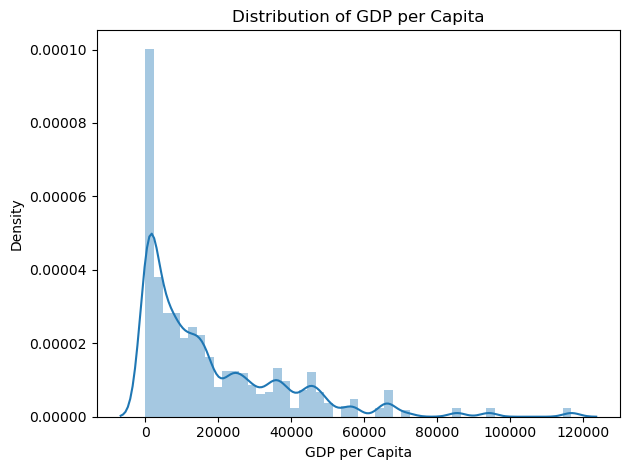

In [15]:
try:
    ax = sns.distplot(df["gdp_per_capita"], kde=True)
    ax.set_title("Distribution of GDP per Capita")
    ax.set_xlabel("GDP per Capita")
    plt.tight_layout()
    plt.savefig(os.path.join(PLOTS_DIR, "univariate_gdp_per_capita.png"))
    plt.show()
except Exception:
    ax = sns.histplot(df["gdp_per_capita"], kde=True)
    ax.set_title("Distribution of GDP per Capita")
    ax.set_xlabel("GDP per Capita")
    plt.tight_layout()
    plt.savefig(os.path.join(PLOTS_DIR, "univariate_gdp_per_capita.png"))
    plt.show()


## 9b. Scatter plot: total_cases vs gdp_per_capita

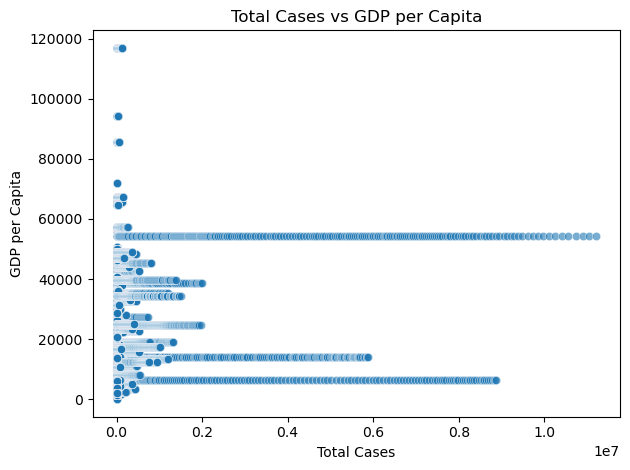

In [16]:
plt.figure()
sns.scatterplot(x="total_cases", y="gdp_per_capita", data=df, alpha=0.6)
plt.title("Total Cases vs GDP per Capita")
plt.xlabel("Total Cases")
plt.ylabel("GDP per Capita")
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, "scatter_total_cases_vs_gdp.png"))
plt.show()


## 9c. Pairplot on grouped data (numeric columns only)

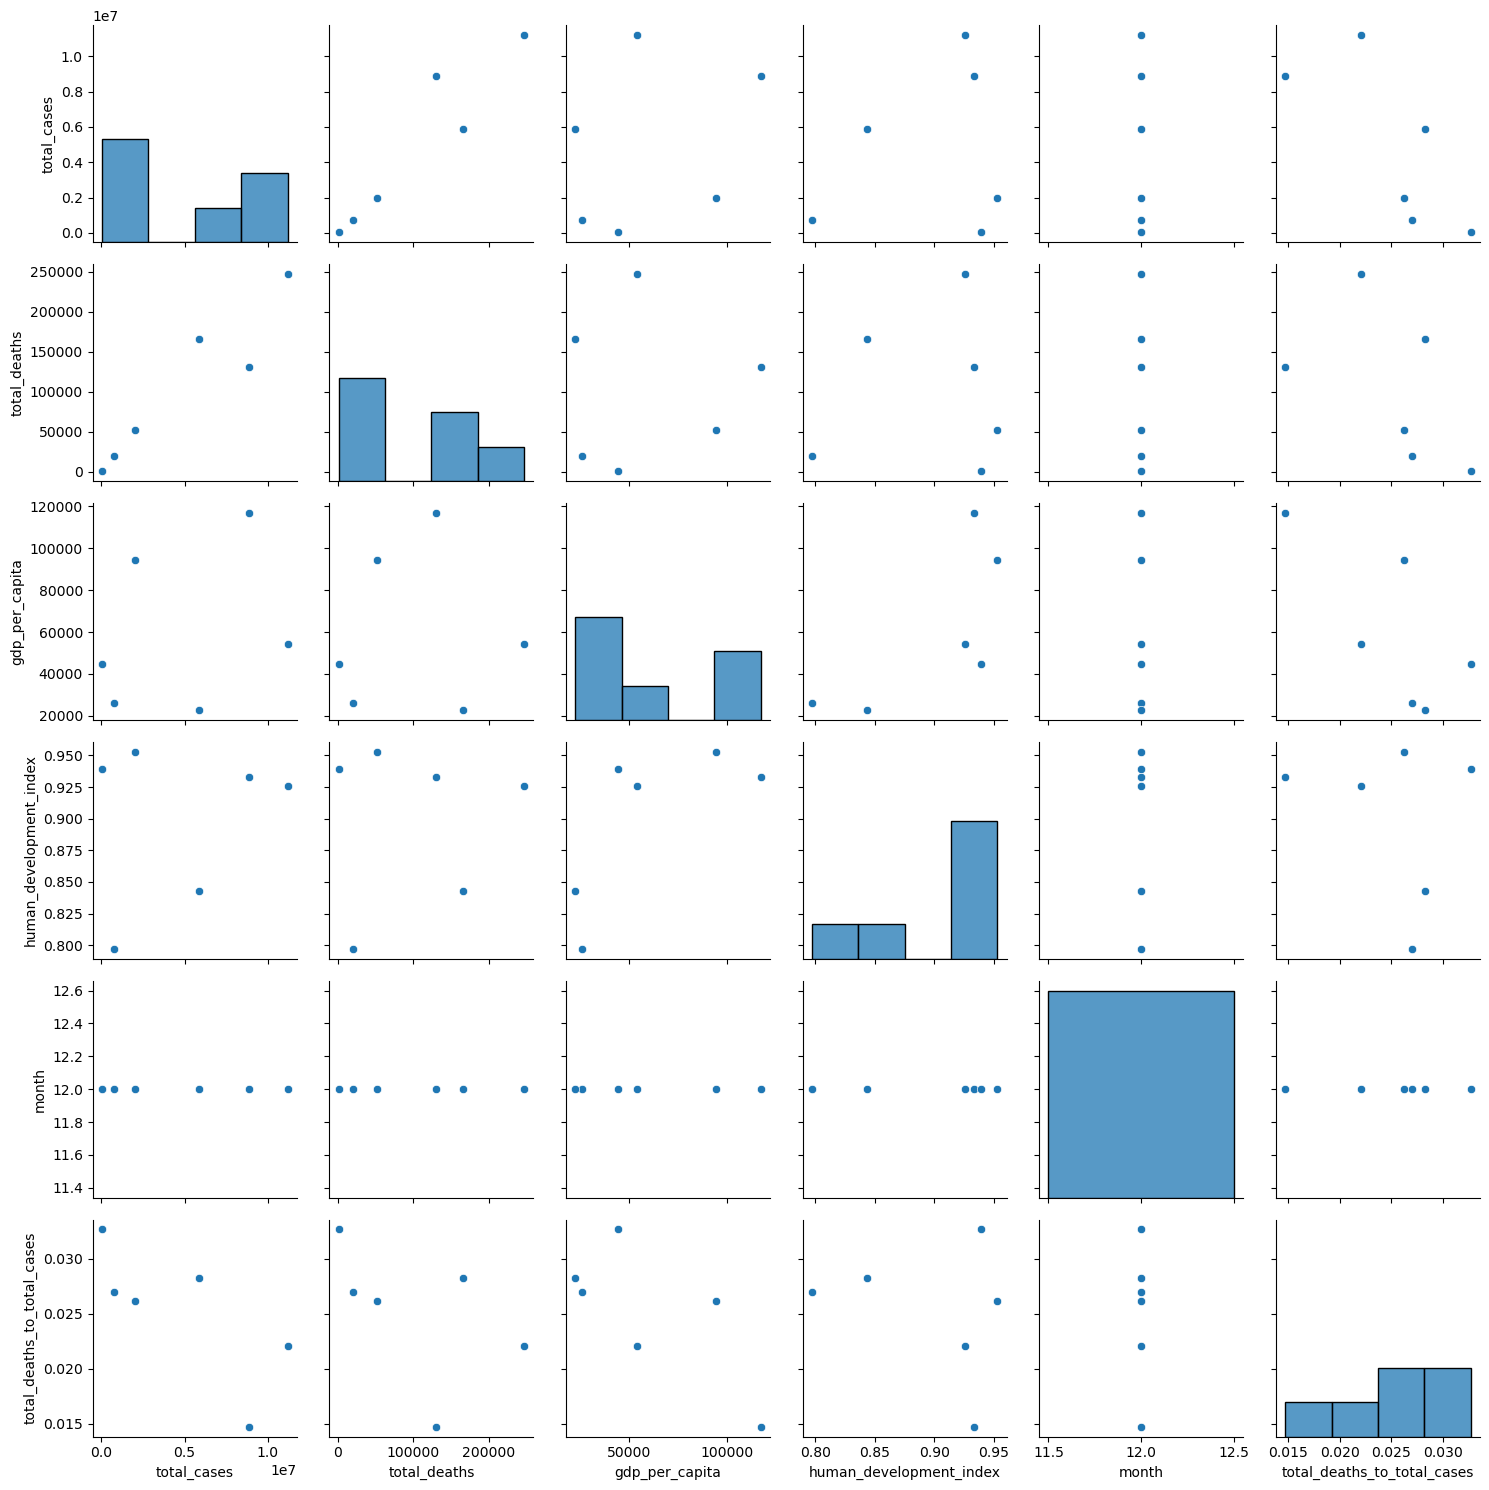

In [17]:
numeric_cols = df_groupby.select_dtypes(include=[np.number]).columns.tolist()
if len(numeric_cols) >= 2:
    sns.pairplot(df_groupby[numeric_cols])
    plt.tight_layout()
    plt.savefig(os.path.join(PLOTS_DIR, "pairplot_df_groupby.png"))
    plt.show()
else:
    print("Not enough numeric columns for pairplot; skipping.")


## 9d. Bar plot: continent vs total_cases (from grouped data)

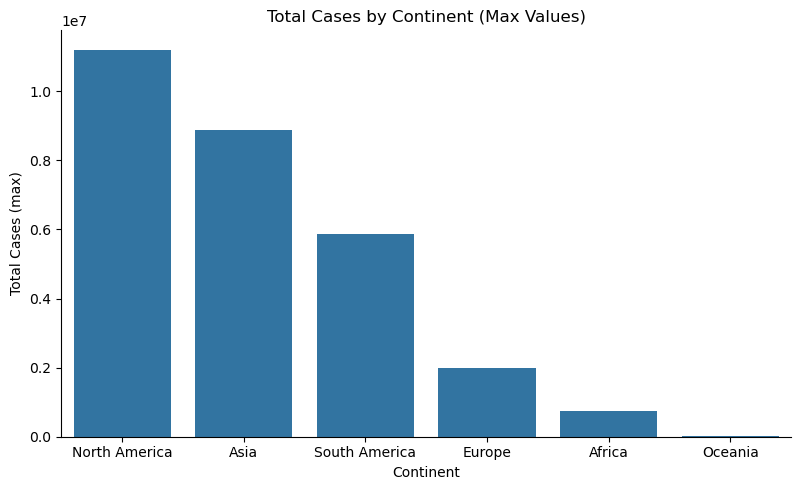

In [18]:
if "total_cases" in df_groupby.columns:
    sns.catplot(
        data=df_groupby.sort_values("total_cases", ascending=False),
        x="continent", y="total_cases", kind="bar", height=5, aspect=1.6
    )
    plt.title("Total Cases by Continent (Max Values)")
    plt.xlabel("Continent")
    plt.ylabel("Total Cases (max)")
    plt.tight_layout()
    plt.savefig(os.path.join(PLOTS_DIR, "bar_continent_total_cases.png"))
    plt.show()
else:
    print("'total_cases' not in df_groupby; skipping bar plot.")


## 10. Save the grouped dataframe

In [19]:
df_groupby.to_csv(OUTPUT_DF_GROUPBY_CSV, index=False)
print(f"Saved: {OUTPUT_DF_GROUPBY_CSV}")
df_groupby.head()


Saved: df_groupby.csv


,continent,total_cases,total_deaths,gdp_per_capita,human_development_index,month,total_deaths_to_total_cases
0,Africa,752269.0,20314.0,26382.287,0.797,12,0.027004
1,Asia,8874290.0,130519.0,116935.600,0.933,12,0.014708
2,Europe,1991233.0,52147.0,94277.965,0.953,12,0.026188
3,North America,11205486.0,247220.0,54225.446,0.926,12,0.022062
4,Oceania,27750.0,907.0,44648.710,0.939,12,0.032685
